In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
def readData(fileName):
    start = ""
    dict = []
    data={}
    with open(fileName, "r") as f:
        for line in f.readlines():
            if (line.find(":")) == -1:
                continue
            key, value = list(map(lambda x: x.strip(), line.split(":")))
            value=float(value)
            if len(start) == 0:
                start = key
                data[key] = value
                continue
 
            if (key == start):
                data["speedup"] = 1
                data["Esp"] = 1
                dict.append(data)
                data={} # clear
            
            data[key] = value
    # print(dict)        
    return pd.DataFrame(dict) 


        


In [9]:

def append_speedup(dataFrame):
    seq = {}
    # dataFrame["speedup"] = 0
    for index, row in dataFrame.iterrows():
        # print(dataFrame.loc[index, "speedup"])
        if (row[0] == 1): 
            seq[row["problem_size"]] = row["duration(ns/iter)"]
            # dataFrame.loc[index,:]["speedup"] = float(1)
            # dataFrame[index,-1 ] = 1
        else:
            bodies = row["problem_size"]
            seq_t  = seq[bodies]
            para_t = row["duration(ns/iter)"]
            cores = row[0]
            # print(bodies, seq_t, para_t)
            dataFrame.loc[index, "speedup"] = seq_t/para_t
            dataFrame.loc[index, "Esp"] = (seq_t/para_t)/cores
    # print(seq)
        


In [10]:
filepath = "./logs/omp-26-11-2021-19:37:57.log"
data = readData(filepath)
append_speedup(data)

# mpi_file = "./logs/mpi-new.log"
# mpi_data = readData(mpi_file)

# omp_file = "./logs/omp-v0.log"
# omp_data = readData(omp_file)

# fig, ax = plt.subplots()
# data.loc[lambda x: x["body"] == 500].loc[lambda x: x["cores(omp+mpi)"] < 60].plot(
#     ax=ax, x="cores(omp+mpi)", y="duration(ns/iter)", label="omp+mpi")
# mpi_data.loc[lambda x: x["body"] == 500].loc[lambda x: x["cores"] < 60].plot(
#     ax=ax, x="cores", y="duration(ns/iter)", label="mpi")
# omp_data.loc[lambda x: x["body"] == 500].loc[lambda x: x["openmp_thread"] < 60].plot(
#     ax=ax, x="openmp_thread", y="duration(ns/iter)", label="openmp")
# fig.suptitle("body: 500")
# data.loc[lambda x: x["cores(omp+mpi)"] == 9].loc[lambda x: x["body"] < 400].plot(
#     ax=ax, x="body", y="duration(ns/iter)", label="omp+mpi")

# mpi_data.loc[lambda x: x["cores"] == 9].loc[lambda x: x["body"] < 400].plot(
#     ax=ax, x="body", y="duration(ns/iter)", label="mpi")

# display(data.loc[lambda x: x["body"] == 500])


In [11]:
def draw_speedup(data,step=5,grp_label="problem_size", x_label="cores", x_min=0, x_max=128, kind="line", y_label="speedup"):
    draw_df = data.loc[lambda x: x[x_label]<=x_max].loc[lambda x: x[x_label]>=x_min].loc[lambda x: x["problem_size"]>=500]
    draw_df = draw_df.sort_values(by=x_label)
    fig, ax = plt.subplots()
    step_ = step
    for key, grp in draw_df.groupby([grp_label]):
        step_-=1
        label = grp_label +": " + str(int(key))
        if step_ <= 0:
            ax = grp.plot(ax=ax, kind=kind, x=x_label, y=y_label, label=label)
            step_ = step
    plt.legend(loc="best")

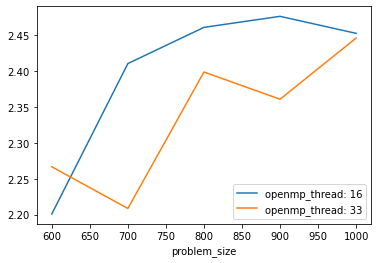

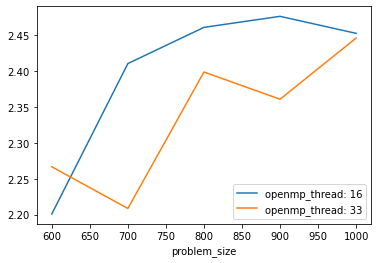

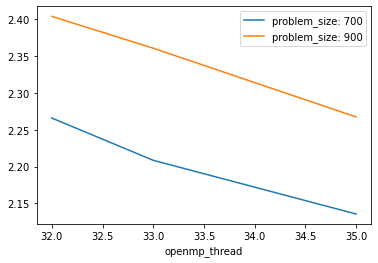

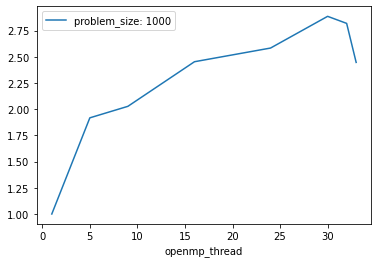

In [12]:
# para_label = "pthread_number"
para_label = "openmp_thread"
# para_label = "cores"
# para_label = "thread_number(cuda)"
# y_label ="duration(ns/iter)"
y_label="speedup"
draw_speedup(data, step=4, x_label="problem_size", grp_label=para_label,x_min=30, x_max=1000, y_label=y_label)
draw_speedup(data, step=4, x_label="problem_size",
             grp_label=para_label, x_min=400, x_max=1000, y_label=y_label)
draw_speedup(data, step=2, x_label=para_label,
             grp_label="problem_size", x_min=32, y_label=y_label)
draw_speedup(data, step=5,x_label=para_label, grp_label="problem_size",
             x_max=35, y_label=y_label)


In [13]:
display(data)

,openmp_thread,problem_size,iterations,duration(ns/iter),speedup,Esp
0,1.0,600.0,4.0,77357241.0,1.000000,1.000000
1,1.0,700.0,4.0,105116835.0,1.000000,1.000000
2,1.0,800.0,4.0,137474044.0,1.000000,1.000000
3,1.0,900.0,4.0,172936268.0,1.000000,1.000000
4,1.0,1000.0,4.0,213408688.0,1.000000,1.000000
5,5.0,600.0,4.0,52041006.0,1.486467,0.297293
6,5.0,700.0,4.0,39840099.0,2.638468,0.527694
7,5.0,800.0,4.0,83306646.0,1.650217,0.330043
8,5.0,900.0,4.0,105285518.0,1.642546,0.328509
9,5.0,1000.0,4.0,111299487.0,1.917427,0.383485


No handles with labels found to put in legend.
No handles with labels found to put in legend.


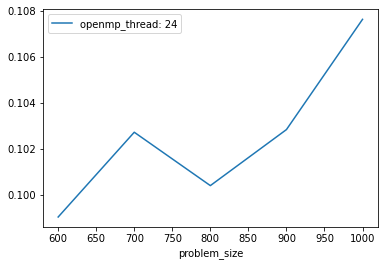

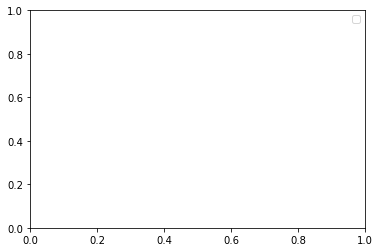

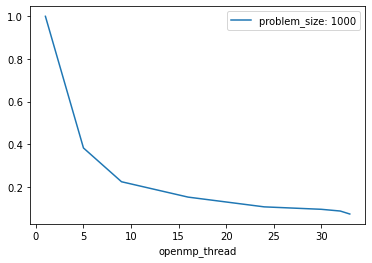

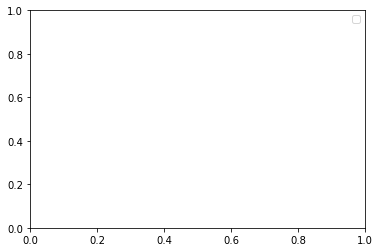

In [14]:
draw_speedup(data, y_label="Esp",x_label="problem_size", grp_label=para_label, x_max=1000)
draw_speedup(data, y_label="Esp",x_label="problem_size",
             grp_label=para_label, x_max=200)
draw_speedup(data, y_label="Esp", x_label=para_label,
             grp_label="problem_size", x_max=100)
draw_speedup(data,step=6, y_label="Esp", x_label=para_label,
             grp_label="problem_size", x_max=100)
